# Homework 4
## Jiaxin Li 77664780

This homework has four tasks to process image with Numpy. Please fill the code block cells with your code and comments, run everything (select cell in the menu, and click Run all), save the notebook, and upload it to canvas.

**For this homework, you should write your code with basic Python or Numpy, and are not allowed to use any other packages/functions for image processing or scientific computing.**


## Load the image

You can use the following codes to load the image. You're required to use this `image` throughout this homework.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

image = data.chelsea()
plt.imshow(image)

`image` is a 3-d Numpy array, where the axis 0 and 1 correspdonds to 2D pixels, and axis 2 corresponds to RGB channels.

In [2]:
image.shape

(300, 451, 3)

In [3]:
len(image)

300

## Task 1: Converting from RGB to Gray Scale Image

Create the gray scale image, represented by the 2D Numpy array `image_gray` from the RGB image tensor `image` above. 

To do this, for each pixel (i,j), you can use the formula $$Y_{ij} = 0.2125\times R_{ij} + 0.7154\times G_{ij} + 0.0721\times B_{ij},$$
where $Y_{ij}$ denotes the intensity of that pixel in gray scale image `image_gray`, and $R_{ij},G_{ij},B_{ij}$ denotes the intensity of that pixel in the RGB image respectively.

Of course in your code you're encouraged to use array implementations/functions instead of looping through every pixel.


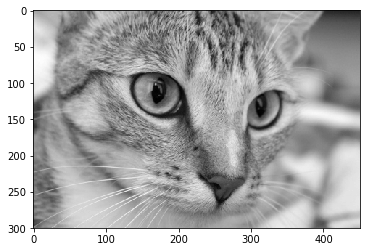

In [6]:
# write your code to generate the array image_gray here

image_gray=image@np.array([0.2125,0.7154,0.0721])

# you can then use the following code to show the gray scale image -- please rerun your code before submission
plt.imshow(image_gray,plt.get_cmap('gray'))

In [7]:
image_gray.shape

(300, 451)

## Task 2: Convolution, Blur and Sharpen

For the $m\times n$ image matrix $I$, and the $3\times 3$ kernel matrix $K$, the convolution is defined as the matrix $C_{m\times n}$ with the element $$C_{ij} = \sum_{k=1}^{3}\sum_{l=1}^{3}I_{i+k-2,j+l-2}K_{k,l}.$$
To ensure all the indices are well-defined, we set all $I_{i,j}=0$ for $i$ and $j$ out of bounds.

1. First, you are asked to define a function called `convolve_2d` below, which takes the gray-scale image matrix `image` and $3\times 3$ kernel matrix `kernel` ( both are Numpy 2D arrays) as the input, and return the convolution matrix as Numpy 2D array.

    *Hint:* (you don't have to follow this hint as long as you write the correct codes)
    
    1) In the code, to deal with the annoying boundary conditions, you can initialize a large all-zero 2d matrix $\tilde{I}$ with dimension $(m+2)\times (n+2)$, and set $\tilde{I}_{ij}=I_{i-1,j-1}$ for $2\leq i,j \leq m+1$. Then $$C_{ij} = \sum_{k=1}^{3}\sum_{l=1}^{3}\tilde{I}_{i+k-1,j+l-1}K_{k,l},$$ and you don't have to worry about the out of bound issue of index during the loop if you fetch element from $\tilde{I}$.
    
    2) For element-wise product operations, you can use the operator `*` of two matrix. To calculate the sum, you can also try the [numpy.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) function or method .

In [8]:
image_gray.shape

(300, 451)

In [9]:
# write your code here -- of course you can delete my hints and write your own
def convolve_2d(image, kernel):
    """
    write your documentation here
    """
    # get dimensions information
    m = image.shape[0]
    n = image.shape[1]
    
    # initialize the output matrix
    output = np.zeros((m,n))

    # Define the zero boundaries (padding) to the input image -- this is the I-tilde
    image_padded = np.zeros((m+2, n+2))
    image_padded[1:-1, 1:-1] = image

    # Now you can loop every pixel to compute convolution -- may use two for loops. Please continue your code here -- don't forget return!
    for i in range(1,m+1):
        for j in range(1,n+1):
            output[i-1,j-1]=np.sum(image_padded[i-1:i+2,j-1:j+2]*kernel)

    return output
            
    
    
    
    
    
    
    

2. Then use the code to compute two convolution matrices (2D Numpy array) `image_blur` and `image_sharp`. Here `image_blur` is the convolution between `image_gray` and Gaussian blur kernel $$K_{b} = \frac{1}{16}\begin{pmatrix}
  1 & 2 & 1\\ 
  2 & 4 & 2 \\
  1 & 2 & 1
\end{pmatrix},$$ and `image_sharp` is the convolution between `image_gray` and sharpen kernel $$K_{s} = \begin{pmatrix}
  0 & -1 & 0\\ 
  -1 & 5 & -1 \\
  0 & -1 & 0
\end{pmatrix}.$$

In [10]:
# write your code to generate image_blur and image_sharp here

kblur=np.array([[1,2,1],[2,4,2],[1,2,1]])*(1/16)
ksharp=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_blur=convolve_2d(image_gray,kblur)
image_sharp=convolve_2d(image_gray,ksharp)




In [11]:
image_blur.shape

(300, 451)

You can use the following codes to visualize the effects of convolutions by different kernels (Remember to re-run the code before submission).

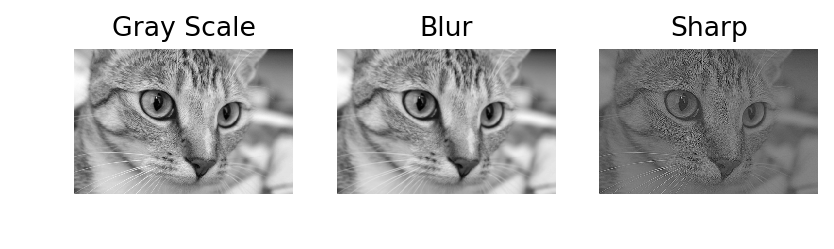

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, dpi=160)

ax1.imshow(image_gray, cmap='gray') 
ax1.set_title('Gray Scale')
ax1.set_axis_off()

ax2.imshow(image_blur, cmap='gray')
ax2.set_title('Blur')
ax2.set_axis_off()

ax3.imshow(image_sharp, cmap='gray')
ax3.set_title('Sharp')
ax3.set_axis_off()

## Task 3 : Blurring the image for multiple times

Compute three Numpy arrays called `image_blur_20`,`image_blur_40` and `image_blur_60` which denote the images that you obtain by applying the convolution with blur kernel for 20, 40 and 60 times on the original image_gray respectively.

In [12]:
# write your code to generate image_blur_20,image_blur_40 and image_blur_06 here
image_blur_20 = image_blur
image_blur_40 = image_blur
image_blur_60 = image_blur


for i in range(20):
    image_blur_20=convolve_2d(image_blur_20,kblur)
for i in range(40):
    image_blur_40=convolve_2d(image_blur_40,kblur)
for i in range(60):
    image_blur_60=convolve_2d(image_blur_60,kblur)




You can use the following codes to generate the comparisons (please re-run block before submission).

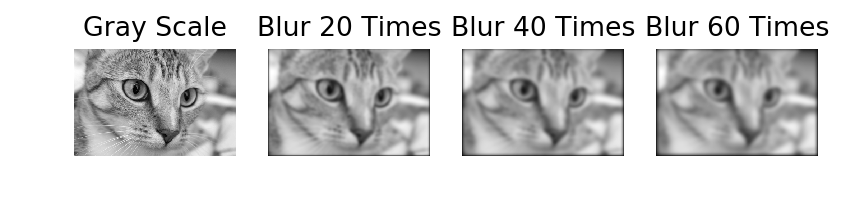

In [13]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, dpi=160)

im = ax1.imshow(image_gray, cmap='gray') 
ax1.set_title('Gray Scale')
ax1.set_axis_off()

ax2.imshow(image_blur_20, cmap='gray')
ax2.set_title('Blur 20 Times')
ax2.set_axis_off()

ax3.imshow(image_blur_40, cmap='gray')
ax3.set_title('Blur 40 Times')
ax3.set_axis_off()

ax4.imshow(image_blur_60, cmap='gray')
ax4.set_title('Blur 60 Times')
ax4.set_axis_off()

## Task 4: Edge Detection
Perform the edge detection with [sobel operator](https://en.wikipedia.org/wiki/Sobel_operator) on `image_gray`, and obtain the Numpy array called `image_sobel`. 

To do this, you may follow these steps (note that the following notations might be different with the wikipedia link, but won't affect the final result):

1.Create two kernel matrices called `Gx` and `Gy` such that

$$G_{x} = \begin{pmatrix}
  -1 & 0 & 1\\ 
  -2 & 0 & 2 \\
  -1 & 0 & 1
\end{pmatrix}, G_{y} = \begin{pmatrix}
  -1 & -2 & -1\\ 
  0 & 0 & 0 \\
  1 & 2& 1
\end{pmatrix}.$$

2.Generate `image_gx` and `image_gy` by applying kernels `Gx` and `Gy` on `image_gray` to compute the convolutions. You can use the function `convolve_2d` defined above.

3.The $(i,j)$ element of `image_sobel` (matrix S) is defined as $$S_{ij}=\sqrt{X_{ij}^{2}+Y_{ij}^{2}},$$ where matrix X and Y represents `image_gx` and `image_gy` respectively.

In [14]:
# write your code to generate image_sobel here
Gx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Gy=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
X=convolve_2d(image_gray,Gx)
Y=convolve_2d(image_gray,Gy)
image_sobel=np.sqrt(X*X+Y*Y)



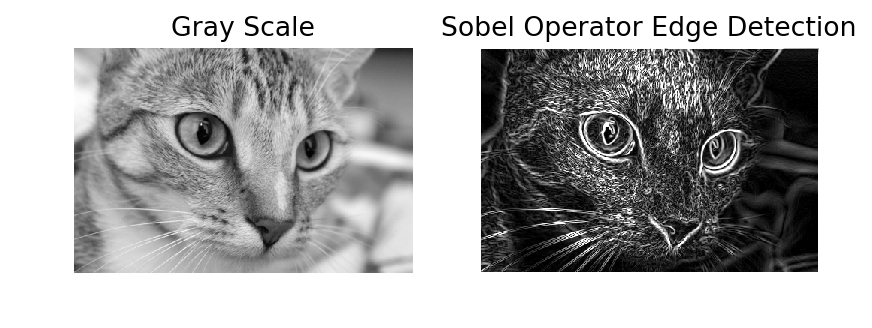

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, dpi=160)
im = ax1.imshow(image_gray, cmap='gray') 
ax1.set_title('Gray Scale')
clim=im.properties()['clim']
ax1.set_axis_off()

ax2.imshow(image_sobel, cmap='gray',clim=clim)
ax2.set_title('Sobel Operator Edge Detection')
ax2.set_axis_off()

## Optional Task (Not Graded)

Rewrite all the codes above with object-oriented programming style, i.e. you create the Class (called myImage, for instance), and all the implementations above should be provided as the method defined in the class. It would be better if your class could support RGB images.

*Note*: the optional task will not be graded, but it will serve as the reference to determine the A+ grades of this course.

In [16]:
## write your code here





